
# **Исследование рейтинга фильмов (imdb)**

Влияет ли жанр, страна и год выпуска фильмов на оценку зрителя?

Стали ли снимать больше фильмов за последние 120 лет? Сопровождается ли это улучшением их качества?

Попробуем ответить на эти и другие вопросы с помощью данных о рейтинге фильмов на imdb.

[Источник датасета](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

## Подготовка данных
Загрузим данные из .csv файла в переменную movies и посмотрим на первые пять строк

In [2]:
movies = pd.read_csv('E:\data\IMDBdataset\IMDb movies.csv')
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Общая информация о данных таблицы movies

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  int64  
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Рассмотрим более подробно, какие данные у нас имеются для анализа.

В датасете представлена информация о 85 855 фильмах.

Всего в таблице 22 столбца:
- imdb_title_id - уникальный идентификатор фильма. Тип данных: object.
- title - название фильма на языке, отличном от языка страны, где был выпущен фильм. Тип данных: object 
- original_title - название фильма на языке оригинала (страны, где был выпущен фильм). Тип данных: object 
- year - год выпуска фильма. Тип данных: int64  
- date_published - дата премьеры фильма. Тип данных: object 
- genre - жанр фильма. Фильм может иметь несколько жанров. Тип данных: object 
- duration - продолжительность фильма в минутах. Тип данных: int64  
- country - страна производства. Фильм мог быть снят в нескольких странах. Тип данных: object 
- language - язык, мог сниматься на нескольких языках. Тип данных: object 
- director - режиссер. Тип данных:  object 
- writer - сценарист. Тип данных: object 
- production_company - кинокомпания. Тип данных: object 
- actors - список актеров. Тип данных: object 
- description - краткое описание фильма. Тип данных: object 
- avg_vote - рейтинг фильма на imdb на основе оценок пользователей сайта. Тип данных: float64
- votes - количество таких оценок. Тип данных:  int64  
- budget - бюджет фильма. Данные представлены в формате 'валюта сумма'. Тип данных: object 
- usa_gross_income - сборы в США. Данные представлены в формате 'валюта сумма'. Тип данных: object 
- worlwide_gross_income - сборы в мире. Данные представлены в формате 'валюта сумма'. Тип данных: object 
- metascore  - рейтинг фильма на сайте https://www.metacritic.com/ . Тип данных: float64
- reviews_from_users - количество рецензий от пользователей сайта imdb. Тип данных: float64
- reviews_from_critics - количество рецензий от критиков. Тип данных: float64

Количество значений в столбцах различается. Это говорит о том, что у некоторых фильмов отсутствует информация в ряде столбцов (пропущенные значения).
Для дальнейшего анализа будем использовать не весь датасет, а лишь несколько столбцов: 
imdb_title_id, original_title, year, genre, duration, country, avg_vote, votes.

Сохраним данные столбцы в отдельную переменную movies_short

In [4]:
movies_short = movies.loc[:, ['imdb_title_id', 'original_title', 'year', 'genre', 'duration', 'country', 'avg_vote', 'votes']].copy()
movies_short.head()

,imdb_title_id,original_title,year,genre,duration,country,avg_vote,votes
0,tt0000009,Miss Jerry,1894,Romance,45,USA,5.9,154
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,6.1,589
2,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",5.8,188
3,tt0002101,Cleopatra,1912,"Drama, History",100,USA,5.2,446
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,7.0,2237


## Предобработка данных
Проверим данные на наличие пропущенных значений и дубликатов.

In [5]:
movies_short.isnull().sum()

imdb_title_id      0
original_title     0
year               0
genre              0
duration           0
country           64
avg_vote           0
votes              0
dtype: int64

У 64 фильмов отсутствует информация о стране производства. Заменим пропущенные значения на 'unknown'. После этой операции нужно убедиться, что таблица больше не содержит пропусков.

In [6]:
movies_short['country'] = movies_short['country'].fillna('unknown')
movies_short.isnull().sum()

imdb_title_id     0
original_title    0
year              0
genre             0
duration          0
country           0
avg_vote          0
votes             0
dtype: int64

Необходимо установить наличие дубликатов. 

In [7]:
movies_short.duplicated().sum()

0

Дубликатов не обнаружено.

## Описательная статистика данных

Рассмотрим основные описательные статистики данных

In [8]:
# Столбцы с числовыми данными
pd.set_option('display.float_format', '{:.1f}'.format)
movies_short.describe()

,year,duration,avg_vote,votes
count,85855.0,85855.0,85855.0,85855.0
mean,1993.5,100.4,5.9,9493.5
std,24.2,22.6,1.2,53574.4
min,1894.0,41.0,1.0,99.0
25%,1979.0,88.0,5.2,205.0
50%,2003.0,96.0,6.1,484.0
75%,2013.0,108.0,6.8,1766.5
max,2020.0,808.0,9.9,2278845.0


В нашем датасете представлены фильмы с 1894 по 2020 год. 
Минимальная продолжительность фильма - 41 минута, максимальная - 808 минут, средняя - 100 минут.
Минимальный рейтинг - 1.0, максимальный - 9.9, средний - 9.49.
Минимальное количество оценок - 99, максимальное - 2 278 845. Среднее - 9 493.

In [9]:
# Столбцы с нечисловыми данными
movies_short.describe(include = ['object'])

,imdb_title_id,original_title,genre,country
count,85855,85855,85855,85855
unique,85855,80852,1257,4908
top,tt5057126,Anna,Drama,USA
freq,1,10,12543,28511


Стоблец imdb_title_id содержит уникальные id фильмов, кол-во уникальных значений в столбце равно кол-ву фильмов в датасете (85 855).
Как мы видим, количество уникальных значений в столбце 'genre' равно 1257, что говорит о том, что у фильма может быть несколько жанров. Аналогично со страной производства.

## Фильмы каких жанров больше всего любят зрители?

Посмотрим какие жанры представлены в нашем датасете, сколько фильмов снято в каждом жанре, какая у них средняя продолжительность и средний рейтинг.

In [61]:
# Создаем множество всех жанров, у фильма может быть несколько жанров, жанры разделены запятой. Например: "Adventure, Drama, Fantasy"

genres_set = set()
for index, row in movies_short.iterrows():
    row_genres = row.genre.split(',')
    for i in row_genres:
        genres_set.add(i.strip(' '))

# Создаем датафрейм, где индексы - название жанра, и пустой столбец с количеством фильмов
df_genres = pd.DataFrame({'genre': list(genres_set), 'movies_count': [0 for i in range(len(genres_set))]})
df_genres.set_index('genre', inplace = True)

# С помощью цикла заполняем столбцы о количестве фильмов, средней продолжительности и среднем рейтинге по жанрам
for element in df_genres.index:
    df_genres.loc[element, 'movies_count'] = movies_short.genre.str.contains(element).sum()
    df_genres.loc[element, 'avg_duration'] = movies_short.loc[movies_short.genre.str.contains(element), 'duration'].mean()
    df_genres.loc[element, 'avg_vote'] = movies_short.loc[movies_short.genre.str.contains(element), 'avg_vote'].mean()

df_genres.sort_index(inplace=True)

In [62]:
# Выводим датафрейм в удобно читаемом формате
format_dict = {'avg_duration':'{:.2f}', 'avg_vote':'{:.2f}'}
(df_genres.loc[df_genres.movies_count > 1000, :].style.format(format_dict)
 .background_gradient(subset='movies_count', cmap='Blues')
 .background_gradient(subset='avg_duration', cmap='Greens')
 .background_gradient(subset='avg_vote', cmap='Purples')
)

,movies_count,avg_duration,avg_vote
genre,,,
Action,12948,106.32,5.63
Adventure,7590,99.31,5.85
Animation,2141,87.40,6.38
Biography,2377,114.01,6.62
Comedy,29368,98.22,5.87
Crime,11067,100.21,6.03
Drama,47110,103.77,6.24
Family,3962,97.06,5.93
Fantasy,3812,99.18,5.74


Цветная заливка числовых столбцов помогает визуально идентифицировать наименьшие и наибольшие знаяения переменных.
В таблице выше представлены только те жанры, в которых снято больше 1 000 фильмов.
- наибольшее количество фильмов сняты в жанрах Драма и Комедия.
- наибольшая продолжительность по времени у фильмов в жанрах Биография и Исторический, наименьшая - Анимации и Хорроров.
- наивысший рейтинг также у Биографий и Исторических фильмов, при этом самый маленький средний рейтинг - у Хорроров.

## США лидер по производству классных фильмов? 

In [89]:
# Создаем множество всех стран, фильм мог быть снят в нескольких странах

countries_set = set()
for index, row in movies_short.iterrows():
    row_country = row.country.split(',')
    for i in row_country:
        if i.strip(' ').find('(') > 0:
            i = i.strip(' ')[:i.strip(' ').find('(')]
        countries_set.add(i.strip(' '))

# Создаем датафрейм, где индексы - название страны, и пустой столбец с количеством фильмов
df_countries = pd.DataFrame({'country': list(countries_set), 'movies_count': [0 for i in range(len(countries_set))]})
df_countries.set_index('country', inplace = True)

# С помощью цикла заполняем столбцы о количестве фильмов, средней продолжительности и среднем рейтинге по жанрам
for element in df_countries.index:
    df_countries.loc[element, 'movies_count'] = movies_short.country.str.contains(element).sum()
    df_countries.loc[element, 'avg_duration'] = movies_short.loc[movies_short.country.str.contains(element), 'duration'].mean()
    df_countries.loc[element, 'avg_vote'] = movies_short.loc[movies_short.country.str.contains(element), 'avg_vote'].mean()

# df_countries.sort_index(inplace=True)
#df_countries.sort_values('movies_count', ascending = False)
#pd.set_option('display.max_rows', None)
#df_countries

In [65]:
# Посмотрим на список всех стран, в которых когда-либо снимали фильмы
pd.set_option('display.max_rows', None)
df_countries.sort_index(inplace=True)
df_countries

,movies_count,avg_duration,avg_vote
country,,,
Afghanistan,16,95.4,6.8
Albania,40,99.2,6.6
Algeria,47,107.0,6.5
Andorra,3,100.0,4.6
Angola,8,91.5,6.1
Argentina,853,98.1,6.1
Armenia,21,96.1,6.5
Aruba,5,97.4,4.8
Australia,1181,97.2,5.8


In [67]:
# Выводим датафрейм в удобно читаемом формате (страны с кол-вом фильмов больше 1 000)
format_dict = {'avg_duration':'{:.2f}', 'avg_vote':'{:.2f}'}
(df_countries.loc[df_countries.movies_count > 1000, :].style.format(format_dict)
 .background_gradient(subset='movies_count', cmap='Blues')
 .background_gradient(subset='avg_duration', cmap='Greens')
 .background_gradient(subset='avg_vote', cmap='Purples')
)

,movies_count,avg_duration,avg_vote
country,,,
Australia,1181,97.19,5.76
Belgium,1354,99.48,6.15
Canada,3621,96.99,5.57
China,1166,108.13,6.07
Denmark,1026,97.57,6.00
France,8311,102.39,6.25
Germany,4907,101.17,6.10
Hong Kong,1884,100.16,6.07
India,6373,138.24,6.22


Цветная заливка числовых столбцов помогает визуально идентифицировать наименьшие и наибольшие значения переменных.
В таблице выше представлены только те страны, в которых снято больше 1 000 фильмов.
- наибольшее количество фильмов сняты в США (34 325!), далее с большим отрывом идет Франция (8 311).
- наибольшая продолжительность по времени у фильмов, снятых в Индии (138,24 мин), далее - Северная Корея (110,03 мин) и Южная Корея (110,14 мин)
- наивысший рейтинг у фильмов, снятых в Японии (6,49), Северной (6,33) и Южной (6,33) Корее.

Сравним среднюю оценку по жанрам у фильмов, снятых в США и у фильмов снятых в Японии.

In [102]:
USAvsJapan = pd.DataFrame({'genre': list(genres_set), 'avg_vote_USA': [0 for i in range(len(genres_set))], 'avg_vote_Japan': [0 for i in range(len(genres_set))]})
movies_short_USA = movies_short.loc[movies_short.country.str.contains('USA'),:].copy()
movies_short_Japan = movies_short.loc[movies_short.country.str.contains('Japan'),:].copy()
USAvsJapan.set_index('genre', inplace = True)
for element in USAvsJapan.index:
    USAvsJapan.loc[element, 'avg_vote_USA'] = movies_short_USA.loc[movies_short_USA.genre.str.contains(element), 'avg_vote'].mean()
    USAvsJapan.loc[element, 'avg_vote_Japan'] = movies_short_Japan.loc[movies_short_Japan.genre.str.contains(element), 'avg_vote'].mean()

USAvsJapan.sort_index(inplace = True)
USAvsJapan

,avg_vote_USA,avg_vote_Japan
genre,,
Action,5.3,6.5
Adult,4.3,nan
Adventure,5.7,6.6
Animation,6.1,6.9
Biography,6.6,6.7
Comedy,5.7,6.5
Crime,5.8,6.6
Documentary,7.5,nan
Drama,6.0,6.7


По всем жанрам, по которым в Японии снимали фильмы, японские фильмы получили более высокие оценки зрителей, чем американские фильмы.

## Стали ли снимать больше фильмов?

Изобразим на графике количество ежегодно снимаемых фильмов (не включаем 2020 год).

<AxesSubplot:xlabel='year'>

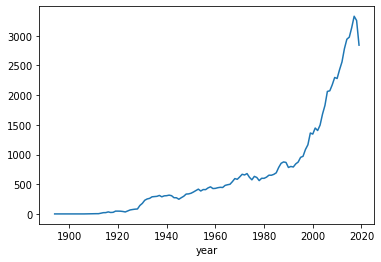

In [26]:
movies_short.groupby('year').year.count().loc[:2019].plot()

Однозначно можно сказать, что за последние 120 лет значительно выросло число ежегодно снимаемых фильмов.

Посмотрим на последние 10 лет.

In [86]:
movies_short.groupby('year').year.count().tail(10)

year
2011    2429
2012    2560
2013    2783
2014    2942
2015    2977
2016    3138
2017    3329
2018    3257
2019    2842
2020     789
Name: year, dtype: int64

За последние 10 лет наиболее количество фильмов было снято в 2017 году - 3 329 фильмов.

Посмотрим на изменение продолжительности и среднего рейтинга фильмов за последние 120 лет.

<AxesSubplot:xlabel='year'>

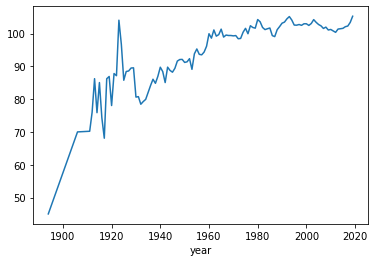

In [27]:
movies_short.groupby('year').duration.mean().loc[:2019].plot()

In [70]:
movies_short.groupby('year').duration.mean().sort_values(ascending = False).head(10)

year
2019   105.3
1993   105.2
2020   104.6
1992   104.5
1980   104.3
2003   104.2
1994   104.1
1923   104.1
1981   103.6
1991   103.5
Name: duration, dtype: float64

По графику заметен рост средней продолжительности фильмов, но, если в случае количества фильмов рост был постепенный, то в случае продолжительности наблюдается скачкообразное увеличение показателя.

Лидеры по средней продолжительности фильмов: 2019, 1993, 2020 года.

P.S. Также можно отметить, что до 1966 года количество выпускаемых фильмов в год было меньше 500, выпуск одного длинного фильма в этот период искажает значение средней продолжительности соответствующего года.

<AxesSubplot:xlabel='year'>

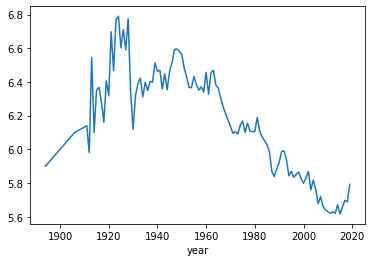

In [82]:
movies_short.groupby('year').avg_vote.mean().loc[:2019].plot()

Согласно представленному графику увеличение количества снимаемых фильмов и их средней продолжительности сопровождается снижением среднего рейтинга фильмов. 
Посмотрим на последние 10 лет.

In [87]:
movies_short.groupby('year').avg_vote.mean().tail(10)

year
2011   5.6
2012   5.6
2013   5.6
2014   5.7
2015   5.6
2016   5.7
2017   5.7
2018   5.7
2019   5.8
2020   5.6
Name: avg_vote, dtype: float64

Последние 10 лет рейтинг фильмов остается на постоянном уровне 5.6 - 5.7.

# Результаты исследования

- Больше всего фильмов сняты в жанрах Драма и Комедия.
- Биографические и Исторические фильмы длятся больше других фильмов по времени, и получают наибольшие оценки зрителей.
- США лидер по количеству снятых фильмов, но средний рейтинг американских фильмов оставляет желать лучшего.
- Наиболее длинные фильмы снимают в Индии.
- Наиболее высокую оценку зрители ставят японским фильмам.
- По всем жанрам японские фильмы получили более высокую оценку зрителей, чем американские фильмы.
- За последние 120 лет наблюдается рост количества снимаемых фильмов и их продолжительности, но начиная с 1960-х годов снижается средний рейтинг фильмов. 